# Cifar-100 이미지 분류
## 전체 데이터중 일부분만 사용
### 모델 출처: Divya Agarwal
#### CIFAR100 데이터 로드

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
import plaidml.keras
plaidml.keras.install_backend()
from tensorflow.python.keras import backend

In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

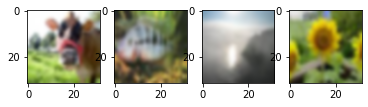

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [6]:
y_train[0], y_train[4], y_train[8], y_train[12]

(array([19]), array([1]), array([23]), array([82]))

#### 자료형 변환 및 스케일링
- X: 실수형으로 정규화
- Y: 1-hot encoding

In [7]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [8]:
Y_train = tf.keras.utils.to_categorical(y_train, 100)
Y_test = tf.keras.utils.to_categorical(y_test, 100)
Y_train[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

#### 자료의 일부만 사용하여 모델 테스트 하기

#### 모형 구현

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Activation
import numpy as np

np.random.seed(2020)

In [10]:
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
# MAXPOOL Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# CONV2D Layer 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# Add a dropout of 10%
model.add(Dropout(0.1))
# CONV2D Layer 3
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout of 25%
model.add(Dropout(0.25))
# flatten 
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512))
model.add(Activation('relu'))
# Adding a dropout of 50%
model.add(Dropout(0.5))
# Output Layer (Fully Connected Layer 2) 
model.add(Dense(100))
model.add(Activation('softmax'))
          
model.summary()

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [11]:
import keras
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=50,
                    validation_data=(X_test, Y_test), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 26s 521us/step - loss: 4.3368 - acc: 0.0422 - val_loss: 3.9658 - val_acc: 0.1067
Epoch 2/100
50000/50000 [==============================] - 20s 392us/step - loss: 3.8914 - acc: 0.1054 - val_loss: 3.6111 - val_acc: 0.1614
Epoch 3/100
50000/50000 [==============================] - 20s 393us/step - loss: 3.6567 - acc: 0.1418 - val_loss: 3.4118 - val_acc: 0.2078
Epoch 4/100
50000/50000 [==============================] - 19s 387us/step - loss: 3.4943 - acc: 0.1695 - val_loss: 3.2670 - val_acc: 0.2296
Epoch 5/100
50000/50000 [==============================] - 19s 384us/step - loss: 3.3663 - acc: 0.1950 - val_loss: 3.1533 - val_acc: 0.2521
Epoch 6/100
50000/50000 [==============================] - 20s 392us/step - loss: 3.2575 - acc: 0.2135 - val_loss: 3.0469 - val_acc: 0.2713
Epoch 7/100
50000/50000 [==============================] - 20s 393us/step - loss: 3.1693 - acc: 0.2277 - val_l

Epoch 59/100
50000/50000 [==============================] - 19s 383us/step - loss: 1.5674 - acc: 0.5602 - val_loss: 1.9874 - val_acc: 0.4848
Epoch 60/100
50000/50000 [==============================] - 19s 389us/step - loss: 1.5608 - acc: 0.5630 - val_loss: 1.9744 - val_acc: 0.4848
Epoch 61/100
50000/50000 [==============================] - 20s 394us/step - loss: 1.5462 - acc: 0.5635 - val_loss: 1.9724 - val_acc: 0.4858
Epoch 62/100
50000/50000 [==============================] - 20s 394us/step - loss: 1.5176 - acc: 0.5712 - val_loss: 1.9747 - val_acc: 0.4898
Epoch 63/100
50000/50000 [==============================] - 20s 392us/step - loss: 1.5092 - acc: 0.5723 - val_loss: 1.9855 - val_acc: 0.4830
Epoch 64/100
50000/50000 [==============================] - 19s 383us/step - loss: 1.4976 - acc: 0.5759 - val_loss: 1.9699 - val_acc: 0.4901
Epoch 65/100
50000/50000 [==============================] - 20s 390us/step - loss: 1.4847 - acc: 0.5804 - val_loss: 1.9626 - val_acc: 0.4896
Epoch 66/100


In [13]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 4s 412us/step

 Test Accuracy: 0.5033


In [16]:
import pandas as pd
pd.DataFrame(history.history)

,val_loss,val_acc,loss,acc
0,3.965776,0.1067,4.336824,0.04220
1,3.611091,0.1614,3.891394,0.10538
2,3.411753,0.2078,3.656653,0.14178
3,3.267014,0.2296,3.494345,0.16946
4,3.153321,0.2521,3.366291,0.19496
...,...,...,...,...
95,1.972467,0.5044,1.139683,0.65986
96,1.986496,0.5034,1.131813,0.66330
97,2.009672,0.4970,1.122869,0.66402
98,2.000153,0.4978,1.108752,0.66770


In [17]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_acc']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['acc']

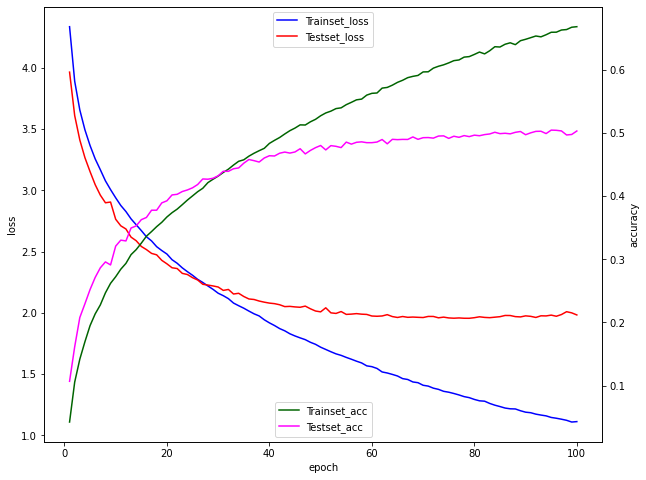

In [18]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()